In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
dx = [-1,0,1,0]
dy = [0,1,0,-1]

In [2]:
def motion(x,u):
    '''
    motion model and associated stage cost
    '''
    if x == (0,1):
        return (4,1), -10
    elif x == (0,3):
        return (2,3), -5
    else:
        new_x = (x[0] + dx[u], x[1] + dy[u])
        if new_x[0] < 0 or new_x[0] >= 5 or new_x[1] <0 or new_x[1] >=5:
            return x, 1
        else:
            return new_x,0
        


In [3]:
value = np.zeros((5,5))
policy = np.zeros((5,5)) # 0,1,2,3 for NESW
thres = 1e-5
gamma = 0.9
value_old = value + 1
while(np.max(np.abs(value - value_old)) > thres):
    print(np.max(np.abs(value - value_old)))
    value_old = np.copy(value)
    for i in range(5):
        for j in range(5):
            x = (i,j)
            v_min = sys.maxsize
            for k in range(4):
                new_x, cost = motion(x,k)
                v = cost + gamma*value_old[new_x[0],new_x[1]]
                v_min = min(v_min,v)
            value[i,j] = v_min 
# compute optimal policy
for i in range(5):
    for j in range(5):
        H_min = sys.maxsize
        x = (i,j)
        for k in range(4):
            new_x, cost = motion(x,k)
            H = cost + gamma * value[new_x[0], new_x[1]]
            if H_min > H:
                policy[i,j] = k
                H_min = H
            

1.0
10.0
9.0
8.1
7.29
6.561
5.904900000000001
5.314410000000002
4.782969000000003
4.304672100000002
3.8742048900000015
3.4867844010000004
3.138105960899999
2.8242953648099984
2.5418658283289997
2.2876792454961006
2.0589113209464927
1.8530201888518434
1.6677181699666583
1.5009463529699918
1.3508517176729917
1.2157665459056943
1.094189891315125
0.9847709021836124
0.8862938119652508
0.7976644307687266
0.7178979876918543
0.6461081889226641
0.581497370030398
0.5233476330273596
0.471012869724623
0.4239115827521598
0.38152042447694257
0.3433683820292508
0.30903154382632536
0.2781283894436939
0.25031555049932663
0.22528399544939504
0.2027555959044527
0.18248003631400778
0.164232032682607
0.14780882941434825
0.1330279464729145
0.11972515182562304
0.10775263664305967
0.09697737297875264
0.08727963568087738
0.07855167211279124
0.07069650490151069
0.06362685441135696
0.057264168970222684
0.05153775207319988
0.04638397686587936
0.04174557917929178
0.037571021261364024
0.03381391913522691
0.03043252

In [4]:
def latex_with_lines(df, *args, **kwargs):
    kwargs['column_format'] = '|'.join([''] + ['l'] * df.index.nlevels
                                            + ['r'] * df.shape[1] + [''])
    res = df.to_latex(*args, **kwargs)
    return res.replace('\\\\\n', '\\\\ \\midrule\n')

[[-21.97747068 -24.41941186 -21.97747068 -19.41941186 -17.47747068]
 [-19.77972361 -21.97747068 -19.77972361 -17.80174304 -16.02156873]
 [-17.80174304 -19.77972361 -17.80174304 -16.02156873 -14.41941186]
 [-16.02156873 -17.80174304 -16.02156873 -14.41941186 -12.97747068]
 [-14.41941186 -16.02156873 -14.41941186 -12.97747068 -11.67972361]]


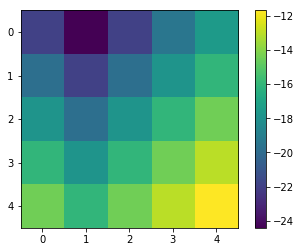

In [5]:
print(value)
plt.imshow(value)
plt.colorbar()
plt.savefig('value_VI.png')

with open('value.tex','w') as f:
    f.write(latex_with_lines(pd.DataFrame(value),header = False, index = False))

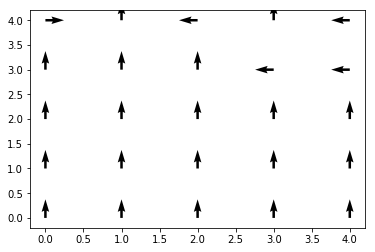

In [6]:
def show_policy(policy,name = None):
    U = np.zeros((5,5))
    V = np.zeros((5,5))
    vec = [(0,1),(1,0),(0,-1),(-1,0)]
    for i in range(5):
        for j in range(5):
            U[4 - i,j] = vec[int(policy[i,j])][0]
            V[4 - i,j] = vec[int(policy[i,j])][1]
    plt.quiver(U, V)
    plt.savefig(name)
    
show_policy(policy,'policy_VI.png')

In [7]:
# policy iteration

value = np.zeros((5,5))
policy = np.zeros((5,5)) # 0,1,2,3 for NESW
thres = 1e-5
gamma = 0.9
value_old = np.copy(value) + 1
value_old_out = np.copy(value)+ 1
while(np.max(np.abs(value - value_old_out)) > thres):
    value_old_out = np.copy(value)
    for tt in range(100):
        value_old = np.copy(value)
        for i in range(5):
            for j in range(5):
                x = (i,j)
                new_x, cost = motion(x,int(policy[i,j]))
                value[i,j] = cost + gamma*value_old[new_x[0],new_x[1]]
    
    # compute policy
    for i in range(5):
        for j in range(5):
            H_min = sys.maxsize
            x = (i,j)
            for k in range(4):
                new_x, cost = motion(x,k)
                H = cost + gamma * value[new_x[0], new_x[1]]
                if H_min > H:
                    policy[i,j] = k
                    H_min = H
#     print(policy)
#     print(np.max(np.abs(value - value_old_out)))

In [8]:
policy

array([[1., 0., 3., 0., 3.],
       [0., 0., 0., 3., 3.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

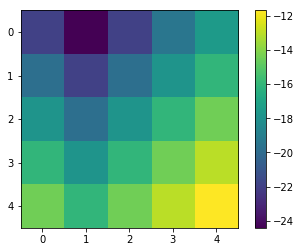

In [9]:
plt.imshow(value)
plt.colorbar()

ValueError: fname must be a PathLike or file handle

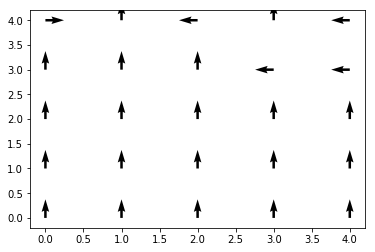

In [10]:
show_policy(policy)

In [ ]:
# Q-value iteration
Q = np.zeros((5,5,4))
policy = np.zeros((5,5)) # 0,1,2,3 for NESW
thres = 1e-5
gamma = 0.9
Q_old = Q + 1
while(np.max(np.abs(Q - Q_old)) > thres):
    print(np.max(np.abs(Q - Q_old)))
    Q_old = np.copy(Q)
    for i in range(5):
        for j in range(5):
            x = (i,j)
            Q_min = sys.maxsize
            for k in range(4):
                new_x, cost = motion(x,k)
                Q[i,j,k] = cost + gamma* np.min(Q_old[new_x[0],new_x[1],:])
# compute optimal policy
for i in range(5):
    for j in range(5):
        Q_min = sys.maxsize
        x = (i,j)
        for k in range(4):
            if Q_min > Q[i,j,k]:
                policy[i,j] = k
                Q_min = Q[i,j,k]

In [ ]:
plt.imshow(value)

ValueError: fname must be a PathLike or file handle

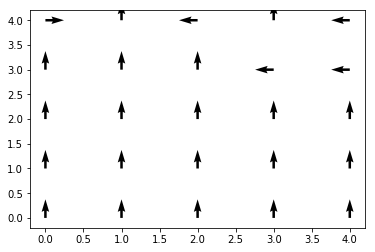

In [11]:
show_policy(policy)

### gamma = 0.8

In [12]:
# Q-value iteration
Q = np.zeros((5,5,4))
policy = np.zeros((5,5)) # 0,1,2,3 for NESW
thres = 1e-5
gamma = 0.8
Q_old = Q + 1
while(np.max(np.abs(Q - Q_old)) > thres):
#     print(np.max(np.abs(Q - Q_old)))
    Q_old = np.copy(Q)
    for i in range(5):
        for j in range(5):
            x = (i,j)
            Q_min = sys.maxsize
            for k in range(4):
                new_x, cost = motion(x,k)
                Q[i,j,k] = cost + gamma* np.min(Q_old[new_x[0],new_x[1],:])
# compute optimal policy
for i in range(5):
    for j in range(5):
        Q_min = sys.maxsize
        x = (i,j)
        for k in range(4):
            if Q_min > Q[i,j,k]:
                policy[i,j] = k
                Q_min = Q[i,j,k]

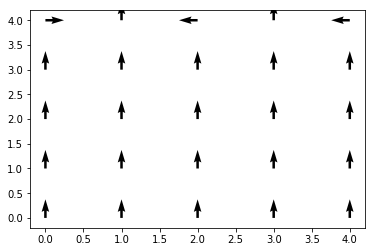

In [13]:
show_policy(policy,'08.png')

### gamma = 0.99

In [30]:
# Q-value iteration
value = np.zeros((5,5))
policy = np.zeros((5,5)) # 0,1,2,3 for NESW
thres = 1e-5
gamma = 0.998
value_old = value + 1
while(np.max(np.abs(value - value_old)) > thres):
    print(np.max(np.abs(value - value_old)))
    value_old = np.copy(value)
    for i in range(5):
        for j in range(5):
            x = (i,j)
            v_min = sys.maxsize
            for k in range(4):
                new_x, cost = motion(x,k)
                v = cost + gamma*value_old[new_x[0],new_x[1]]
                v_min = min(v_min,v)
            value[i,j] = v_min 
# compute optimal policy
for i in range(5):
    for j in range(5):
        H_min = sys.maxsize
        x = (i,j)
        for k in range(4):
            new_x, cost = motion(x,k)
            H = cost + gamma * value[new_x[0], new_x[1]]
            if H_min > H:
                policy[i,j] = k
                H_min = H

1.0
10.0
9.98
9.960040000000001
9.94011992
9.92023968016
9.90039920079968
9.880598402398078
9.860837205593283
9.841115531182098
9.821433300119734
9.801790433519496
9.782186852652458
9.76262247894715
9.743097233989257
9.723611039521277
9.704163817442232
9.684755489807348
9.665385978827736
9.646055206870077
9.626763096456337
9.607509570263431
9.5882945511229
9.569117962020655
9.549979726096616
9.530879766644425
9.511818007111131
9.492794371096913
9.473808782354716
9.454861164790003
9.435951442460421
9.417079539575504
9.398245380496341
9.37944888973535
9.360689991955887
9.341968611971971
9.323284674748038
9.304638105398539
9.286028829187742
9.267456771529368
9.248921857986318
9.23042401427034
9.211963166241802
9.193539239909313
9.175152161429494
9.156801857106629
9.13848825339241
9.120211276885627
9.101970854331853
9.08376691262319
9.065599378797941
9.047468180040354
9.029373243680283
9.011314497192927
8.99329186819854
8.975305284462152
8.95735467389322
8.939439964545429
8.921561084616343

2.2912811777248407
2.2866986153694597
2.282125218138731
2.2775609677024704
2.2730058457669884
2.268459834075429
2.2639229144072033
2.259395068578442
2.2548762784413157
2.2503665258844876
2.245865792832774
2.241374061247143
2.2368913131246018
2.23241753049831
2.2279526954372386
2.2234967900462834
2.2190497964661517
2.2146116968732485
2.2101824734795628
2.2057621085326673
2.2013505843156054
2.196947883147004
2.192553987380734
2.1881688794059073
2.183792541647108
2.179424956563821
2.1750661066507746
2.170715974437485
2.1663745424885974
2.162041793403546
2.1577177098167795
2.153402274397081
2.1490954698482483
2.1447972789086407
2.140507684350837
2.13622666898209
2.1319542156441003
2.127690307212788
2.123434926598293
2.119188056745088
2.1149496806316392
2.1107197812704044
2.1064983417079475
2.1022853450245975
2.098080774334562
2.093884612785814
2.089696843560205
2.0855174498730094
2.081346414973268
2.0771837221433316
2.073029354699088
2.0688832959897354
2.0647455293977828
2.060616038338935


0.6756294516109165
0.6742781927077885
0.6729296363223511
0.6715837770497046
0.6702406094956359
0.6689001282766185
0.6675623280200398
0.6662272033639738
0.6648947489572947
0.6635649594594497
0.6622378295405724
0.6609133538814831
0.6595915271738022
0.6582723441193821
0.6569557994311026
0.6556418878321892
0.654330604056554
0.6530219428483406
0.6517158989627205
0.650412467164756
0.6491116422304231
0.6478134189459297
0.6465177921080567
0.6452247565238167
0.6439343070107952
0.6426464383968096
0.6413611455200225
0.6400784232290562
0.6387982663825369
0.6375206698497777
0.6362456285100961
0.6349731372530414
0.6337031909785082
0.6324357845966233
0.6311709130274039
0.6299085712013266
0.628648754058986
0.6273914565508676
0.6261366736376885
0.6248844002903979
0.6236346314898356
0.6223873622268457
0.6211425875023906
0.6199003023274372
0.618660501722843
0.6174231807193564
0.6161883343579575
0.6149559576890624
0.6137260457736602
0.6124985936820622
0.6112735964946978
0.6100510493017737
0.60883094720327

0.22600323569224656
0.22555122922085502
0.2251001267624133
0.22464992650884597
0.22420062665582918
0.22375222540244977
0.22330472095165987
0.22285811150982227
0.222412395286824
0.22196757049630378
0.22152363535531094
0.2210805880845328
0.2206384269082946
0.22019715005444596
0.2197567557543607
0.21931724224282334
0.21887860775836998
0.2184408505428337
0.21800396884179918
0.2175679609041481
0.21713282498228637
0.2166985593323716
0.2162651622137446
0.2158326318892705
0.21540096662556607
0.21497016469231767
0.21454022436284959
0.2141111439141241
0.21368292162628677
0.21325555578300737
0.21282904467148
0.2124033865821957
0.2119785798090561
0.2115546226494871
0.21113151340421155
0.21070925037736288
0.21028783187659883
0.20986725621287405
0.20944752170044012
0.2090286266570729
0.20861056940373146
0.20819334826489921
0.20777696156835646
0.2073614076451804
0.2069466848298589
0.20653279146017667
0.20611972587732907
0.205707486425581
0.20529607145272166
0.20488547930983714
0.20447570835131046
0.2

0.08339196705139784
0.08322518311729254
0.08305873275105569
0.0828926152855729
0.08272683005498038
0.08256137639489225
0.08239625364217318
0.08223146113471103
0.08206699821244001
0.08190286421609017
0.08173905848764207
0.08157558037066792
0.08141242920999048
0.08124960435156936
0.08108710514284212
0.08092493093261055
0.08076308107069963
0.08060155490852594
0.08044035179875664
0.08027947109508204
0.08011891215289779
0.079958674328509
0.07979875697981242
0.07963915946584166
0.07947988114699456
0.07932092138480584
0.0791622795419471
0.07900395498290891
0.07884594707286396
0.07868825517869027
0.07853087866840269
0.07837381691103928
0.07821706927722971
0.07806063513874051
0.07790451386847508
0.07774870484070107
0.07759320743105036
0.07743802101617803
0.07728314497410338
0.07712857868409628
0.07697432152679085
0.07682037288373067
0.07666673213793729
0.07651339867368279
0.07636037187637612
0.07620765113256311
0.07605523583038121
0.07590312535864996
0.07575131910789423
0.07559981646966207
0.07

0.03040304112391823
0.030342235041644017
0.030281550571544358
0.030220987470443106
0.030160545495505175
0.030100224404463916
0.03004002395562111
0.029979943907733286
0.029919984019898038
0.029860144051895077
0.029800423763845174
0.02974082291632385
0.02968134127047506
0.0296219785878975
0.029562734630758314
0.029503609161452005
0.02944460194316889
0.029385712739326664
0.029326941313684074
0.029268287431023055
0.029209750856239225
0.029151331354569265
0.02909302869181829
0.029034842634473534
0.02897677294913592
0.02891881940320218
0.0288609817644101
0.028803259800838532
0.02874565328124845
0.028688161974741888
0.028630785650761936
0.028573524079547497
0.028516377031451157
0.02845934427739394
0.0284024255888653
0.028345620737695754
0.028288929496170567
0.028232351637143438
0.028175886933809124
0.02811953515993082
0.028063296089612777
0.028007169497413997
0.027951155158461916
0.027895252848225027
0.02783946234251289
0.027783783417817176
0.027728215850970628
0.02767275941926073
0.027617413

0.009654219851427115
0.009634911411694702
0.009615641588879953
0.009596410305675818
0.009577217485116307
0.009558063050121746
0.009538946924067204
0.009519869030214068
0.00950082929216478
0.009481827633635476
0.009462863978342284
0.009443938250342399
0.009425050373920385
0.009406200273247123
0.009387387872607178
0.00936861309685355
0.009349875870725555
0.009331176118962503
0.009312513766758457
0.00929388873919379
0.009275300961689936
0.009256750359782018
0.009238236859005156
0.009219760385349218
0.0092013208645767
0.009182918222791159
0.009164552386323521
0.009146223281618404
0.009127930835006737
0.009109674973387882
0.009091455623547517
0.009073272712271319
0.00905512616679971
0.009037015914486801
0.009018941882686704
0.009000903998867216
0.008982902190837194
0.008964936386519184
0.008947006513722044
0.00892911250070938
0.008911254275744795
0.008893431767205584
0.008875644903582725
0.008857893613821943
0.008840177826527906
0.008822497470873714
0.008804852475918779
0.008787242770949888

0.003133872966600393
0.00312760522069766
0.003121350010246715
0.0031151073102364535
0.003108877095655771
0.0031026593414935633
0.003096454022852413
0.0030902611148349024
0.0030840805923162407
0.0030779124310811312
0.0030717566062321566
0.003065613093099273
0.003059481867012437
0.003053362903301604
0.0030472561775241047
0.0030411616651235818
0.003035079341771052
0.0030290091830238453
0.003022951164666665
0.0030169052623705284
0.0030108714519201385
0.0030048497089865123
0.002998840009581727
0.002992842329490486
0.0029868566448385536
0.00298088293152432
0.0029749211656735497
0.0029689713234120063
0.0029630333807517673
0.0029571073139322834
0.0029511930993066926
0.0029452907131144457
0.0029394001317086804
0.0029335213314425346
0.0029276542887828327
0.0029217989801963995
0.0029159553822637463
0.0029101234715653845
0.002904303224568139
0.002898494618193581
0.002892697629022223
0.0028869122337482622
0.0028811384092932713
0.002875376132465135
0.0028696253801854255
0.0028638861293757145
0.00285

0.0010254711022525953
0.0010234201599814696
0.0010213733196451358
0.0010193305730581415
0.0010172919119213475
0.0010152573280493016
0.001013226813483925
0.001011200359812392
0.0010091779590766237
0.0010071596032048546
0.0010051452840116326
0.001003134993425192
0.0010011287234874544
0.0009991264660129673
0.000997128213043652
0.0009951339566214301
0.000993143688674536
0.000991157401244891
0.0009891750864881033
0.0009871967363324075
0.0009852223429334117
0.0009832518982193506
0.000981285394459519
0.0009793228236958385
0.000977364178083917
0.0009754094495519894
0.0009734586307104109
0.0009715117133737294
0.0009695686900386136
0.0009676295526332979
0.0009656942935407642
0.0009637629049166208
0.0009618353791438494
0.0009599117083780584
0.0009579918850022295
0.0009560759012856579
0.0009541637494976385
0.0009522554220211532
0.0009503509111254971
0.0009484502093073388
0.0009465533088359734
0.0009446602022080697
0.0009427708818066094
0.0009408853400145745
0.0009390035693286336
0.0009371255622454

0.00033690261523133813
0.00033622881005612726
0.0003355563524110039
0.0003348852396811708
0.0003342154691381438
0.00033354703828081256
0.00033287994415331923
0.0003322141842545534
0.0003315497559697178
0.00033088665634295467
0.0003302248829868404
0.0003295644332865777
0.00032890530439999566
0.00032824749382598384
0.00032759099883605813
0.0003269358168154213
0.000326281945149276
0.00032562938133651187
0.0003249781226486448
0.00032432816635719064
0.00032367951007472584
0.0003230321510727663
0.0003223860867365147
0.00032174131456486066
0.0003210978319430069
0.00032045563625615614
0.00031981472500319796
0.0003191750955693351
0.0003185367454534571
0.0003178996719270799
0.0003172638726027799
0.00031662934475207294
0.0003159960861012223
0.0003153640939217439
0.00031473336559884046
0.0003141038988587752
0.0003134756910867509
0.00031284873978165706
0.00031222304232869647
0.00031159859622675867
0.00031097539897473325
0.0003103534481851966
0.0003097327412433515
0.0003091132757617743
0.00030849504

0.00011314865184886003
0.00011292235456039634
0.00011269650985923363
0.00011247111683587718
0.0001122461745808323
0.00011202168218460429
0.00011179763885138527
0.00011157404367168056
0.0001113508956223086
0.0001111281937937747
0.00011090593739027099
0.00011068412550230278
0.00011046275722037535
0.00011024183174868085
0.00011002134806403774
0.00010980130537063815
0.00010958170275898738
0.00010936253931959072
0.00010914381425664033
0.00010892552666064148
0.00010870767562209949
0.00010849026023151964
0.00010827327969309408
0.0001080567330973281
0.00010784061964841385
0.00010762493843685661
0.00010740968855316169
0.00010719486920152121
0.00010698047947244049
0.00010676651845642482
0.00010655298535766633
0.00010633987938035716
0.00010612719961500261
0.00010591494526579481
0.00010570311530955223
0.00010549170906415384
0.00010528072573379177
0.00010507016429528448
0.00010486002406651096
0.00010465030402428965
0.00010444100348649954
0.00010423212142995908
0.00010402365717254725
0.0001038156098

3.445013351210946e-05
3.4381233149360924e-05
3.4312470688746544e-05
3.424384578920581e-05
3.41753581096782e-05
3.410700730910321e-05
3.403879338748084e-05
3.397071577637689e-05
3.390277436210454e-05
3.383496880360326e-05
3.376729875981255e-05
3.369976411704556e-05
3.363236453424179e-05
3.356509989771439e-05
3.349796975271602e-05
3.343097387187299e-05
3.3364111914124805e-05
3.3297383765784616e-05
3.3230788972105074e-05
3.316432741939934e-05
3.3097998766606906e-05
3.303180278635409e-05
3.2965739137580385e-05
3.289980770659895e-05
3.283400803866243e-05
3.276833990639716e-05
3.270280319611629e-05
3.263739756675932e-05
3.257212279095256e-05
3.250697852763551e-05
3.244196454943449e-05
3.237708062897582e-05
3.231232653888583e-05
3.2247701938104e-05
3.2183206599256664e-05
3.2118840181283304e-05
3.205460257049708e-05
3.199049331215065e-05
3.192651229255716e-05
3.1862659284342953e-05
3.1798933946447505e-05
3.173533605149714e-05
3.167186537211819e-05
3.1608521680936974e-05
3.154530463689298e-05
3

1.1386237588340009e-05
1.136346509156283e-05
1.1340738183207577e-05
1.1318056749587413e-05
1.12954206770155e-05
1.1272829851805e-05
1.1250284160269075e-05
1.1227783602407726e-05
1.1205327950847277e-05
1.1182917205587728e-05
1.1160551366629079e-05
1.1138230320284492e-05
1.1115953839180293e-05
1.109372192331648e-05
1.1071534572693054e-05
1.1049391446249501e-05
1.102729265767266e-05
1.1005238093275693e-05
1.0983227639371762e-05
1.0961261182274029e-05
1.0939338721982494e-05
1.0917460031123483e-05
1.0895625109696994e-05
1.087383384401619e-05
1.0852086120394233e-05
1.0830381938831124e-05
1.0808721185640024e-05
1.0787103747134097e-05
1.0765529623313341e-05
1.0743998586804082e-05
1.0722510523919482e-05
1.0701065548346378e-05
1.0679663319024257e-05
1.0658303949639958e-05
1.0636987326506642e-05
1.0615713449624309e-05
1.0594481977932446e-05
1.0573293025117891e-05
1.0552146477493807e-05
1.0531042221373355e-05
1.0509980143069697e-05
1.0488960128895997e-05
1.0467982178852253e-05
1.0447046179251629e-

In [31]:
value

array([[-1001.99899828, -1004.00701231, -1001.99899828,  -999.00701231,
         -997.00899828],
       [ -999.99499031, -1001.99899828,  -999.99499031,  -997.99500033,
         -995.99901033],
       [ -997.99500033,  -999.99499031,  -997.99500033,  -995.99901033,
         -994.00701231],
       [ -995.99901033,  -997.99500033,  -995.99901033,  -994.00701231,
         -992.01899828],
       [ -994.00701231,  -995.99901033,  -994.00701231,  -992.01899828,
         -990.03495031]])

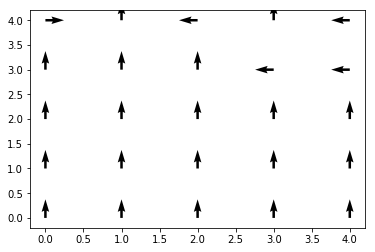

In [32]:
show_policy(policy,'099.png')